# **Домашнее задание №1 (pro)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [728]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

import math
import re

random.seed(42)
np.random.seed(42)

### **Задание 0**
Для чего фиксируем сиды в домашках?

`Мы это делаем для воспроизводимости, т.е. если кто-то еще запустит наш код, то получит такие же результаты.`

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [729]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


In [730]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


In [731]:
df_train = df_train.replace({np.nan: None})
df_test = df_test.replace({np.nan: None})

### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [ ] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [ ] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [ ] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла)

Посмотрим есть ли в датасете дубликаты:

In [732]:
df_train.drop_duplicates(inplace=True)

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6014, 13)
Test data shape:  (1000, 13)


Количество данных стало меньше, поэтому в датасете были дубликаты.

Количество пропусков для каждого столбца для train и test:

In [733]:
pd.DataFrame(df_train.isna().sum()).T

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,0,0,0,0,0,0,0,0,190,190,187,191,190


In [734]:
pd.DataFrame(df_test.isna().sum()).T

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,0,0,0,0,0,0,0,0,19,19,19,19,19


In [735]:
!pip install ydata_profiling -q

In [736]:
from ydata_profiling import ProfileReport

profile_report = ProfileReport(df_train, title='Pandas Profiling Report')
profile_report.to_file('car_prices_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/pandas/summary_pandas.py:39: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  series = series.fillna(np.nan)


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Из загруженного дашборда можно сделать следующие выводы:

- 5 текстовых переменных, 4 числовые и 4 категориальные.
- Из всех ячеек в 1.2% есть пропуски.
- Распределение целевой переменной очень похоже на логнормальное (возможно, в будущем стоит ее прологарифмировать).
- У категориальных признаков видим сильный дисбаланс (например, в основном встречаются автомобили с ручной коробкой передач).

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

Основные статистики по числовым столбцам для train:

In [737]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
year,6014.0,2013.447456,4.079920,1983.0,2011.0,2014.0,2017.0,2020.0
selling_price,6014.0,521982.029598,533842.621511,29999.0,250000.0,409999.0,640000.0,10000000.0
km_driven,6014.0,73764.149651,59610.746762,1.0,39000.0,70000.0,100000.0,2360457.0


Основные статистики по числовым столбцам для test:

In [738]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1000.0,2013.681,4.012149,1995.0,2011.0,2014.0,2017.0,2020.0
selling_price,1000.0,617901.042,758553.860710,31000.0,250000.0,434999.0,670000.0,6000000.0
km_driven,1000.0,71393.341,48486.218662,1303.0,37000.0,61500.0,100000.0,375000.0


`Как в train, так и в test мы видим, что среднее у всех признаков отличается от медианы, что говорит о том, что распределения перекошены в разные стороны. Если сравнивать train и test между собой, то можно увидеть незначительную разницу в показателях медианы и среднего значения, однако это вряд-ли на что-то влияет.`

Основные статистики по категориальным столбцам для train:

In [739]:
df_train.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6014,6014,6014,6014,6014,5824,5824,5827,5823,5824.0
unique,1924,4,3,2,5,386,120,316,419,9.0
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
freq,107,3269,5394,5505,3721,184,795,282,417,4572.0


Основные статистики по категориальным столбцам для test:

In [740]:
df_test.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000,1000,1000,1000,981,981,981,981,981.0
unique,621,4,3,2,5,237,88,182,226,6.0
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,5.0
freq,15,534,837,877,623,23,116,43,57,758.0


### **Задание 3 (0.2 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.05 балла)
- [ ] Отобразите такие объекты (0.05 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.05 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.05 балла)

In [741]:
df_train_no_target = df_train.drop(columns='selling_price').copy()
df_train.shape[0] - df_train_no_target.drop_duplicates().shape[0]

174

`В df_train есть 174 объекта с одинаковым признаковым описанием.`

In [742]:
duplicates_indices = np.where(df_train_no_target.duplicated())
# Отобразим несколько объектов, которые являются дубликатами.
df_train_no_target.iloc[duplicates_indices].head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
268,Maruti Swift Dzire VXI,2014,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
370,BMW X4 M Sport X xDrive20d,2019,7500,Diesel,Dealer,Automatic,First Owner,16.78 kmpl,1995 CC,190 bhp,400Nm@ 1750-2500rpm,5.0
444,Maruti Alto 800 VXI,2016,50000,Petrol,Individual,Manual,First Owner,22.74 kmpl,796 CC,47.3 bhp,69Nm@ 3500rpm,5.0
766,Chevrolet Beat Diesel LT,2012,70000,Diesel,Individual,Manual,Second Owner,25.44 kmpl,936 CC,57.6 bhp,150Nm@ 1750rpm,5.0
1000,Maruti Alto LXI,2005,40000,Petrol,Individual,Manual,Second Owner,19.7 kmpl,796 CC,46.3 bhp,62Nm@ 3000rpm,5.0


In [743]:
# Удалим объекты с одинаковым признаковым описанием:
df_train_no_target.drop_duplicates(inplace=True)
# Возвращаем обратно target с нужными индексами.
df_train = pd.concat([df_train_no_target, df_train.loc[df_train_no_target.index, 'selling_price']], axis=1)

In [744]:
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [745]:
assert df_train.shape == (5840, 13)

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [746]:
df_train[df_train['mileage'].notna()]['mileage'].apply(lambda x: x.split()[1]).unique()

array(['kmpl', 'km/kg'], dtype=object)

`Мы видим, что у столбца mileage имеется только два уникальных значения единицы измерения. Переведем из km/kg в kmpl по формуле: kmpl = 1.4 * km/kg.`

In [747]:
from sklearn.base import BaseEstimator, TransformerMixin

In [748]:
class MileageTransformer(BaseEstimator, TransformerMixin):

    """
        Трансформирует столбец mileage.
    """

    def __init__(self):
        self.column_name = 'mileage'

    def fit(self, X, y=None):
        return self

    def from_kmkg_to_kmpl(self, x):
        """
            Переводит из km/kg в kmpl следующим образом: kmpl = 1.4 * km/kg
        """
        if not x:
            return x
        value, measure = x.split()
        # Переводим из km/kg в kmpl.
        if measure == "km/kg":
            return float(value) * 1.4
        else:
            return float(value)

    def transform(self, X):
        X = pd.DataFrame(X)
        X[self.column_name] = X[self.column_name].apply(self.from_kmkg_to_kmpl)
        return X

In [749]:
mt = MileageTransformer()

df_train = mt.transform(df_train)
df_test = mt.transform(df_test)

In [750]:
df_train[df_train['engine'].notna()]['engine'].apply(lambda x: x.split()[1]).unique()

array(['CC'], dtype=object)

`У признака engine имеется только одна единица измерения: CC. Уберем ее.`

In [751]:
class EngineTransformer(BaseEstimator, TransformerMixin):

    """
        Трансформирует столбец engine.
    """

    def __init__(self):
        self.column_name = 'engine'

    def fit(self, X, y=None):
        return self

    def remove_unit_power(self, x):
        if not x:
            return x
        return float(x.split()[0])

    def transform(self, X):
        X = pd.DataFrame(X)
        X[self.column_name] = X[self.column_name].apply(self.remove_unit_power)
        return X

In [752]:
et = EngineTransformer()

df_train = et.transform(df_train)
df_test = et.transform(df_test)

`У признака max_power есть четыре состояния: None, 0, ' bhp' значения вида '{value} bhp'. Выкинем три лишние буквы bhp, а также вместо 0 и ' bhp' сделаем значение пропуска (вряд ли у автомобиля может быть такое значение).`

In [753]:
class MaxPowerTransformer(BaseEstimator, TransformerMixin):

    """
        Трансформирует столбец max_power.
    """

    def __init__(self):
        self.column_name = 'max_power'

    def fit(self, X, y=None):
        return self

    def remove_unit_power(self, x):
        if not x:
            return x
        if x in ['0', ' bhp']:
            return None
        return float(x.split()[0])

    def transform(self, X):
        X = pd.DataFrame(X)
        X[self.column_name] = X[self.column_name].apply(self.remove_unit_power)
        return X

In [754]:
mpt = MaxPowerTransformer()

df_train = mpt.transform(df_train)
df_test = mpt.transform(df_test)

Напишем функцию, которая будет парсить столбец torque. Далее, сделаем из него два столбца: torque и max_torque_rpm.

In [755]:
class TorqueTransformer(BaseEstimator, TransformerMixin):

    """
        Трансформирует столбец torque.
    """

    def fit(self, X, y=None):
        return self

    def parse_torque_column(self, x):
        '''
            Парсим столбец torque, чтобы получить два значения: torque и rpm.
            Если для каких-то значений попался интервал, то берем среднее.
            Значение torque будет иметь единицы измерения Nm: Nm = 9.8 * kgm.
        '''
        if not x:
            return x
        x = ' '.join(x.split())
        x = x.lower()
        x = x.replace(',', '')
        found_numbers = re.compile(r'[-+]?(?:\d*\.*\d+)').findall(x)
        # Пример: 190Nm@ 2000rpm
        if re.compile(r'[-+]?(?:\d*\.*\d+)nm@ [-+]?(?:\d*\.*\d+)rpm').fullmatch(x):
            return list(map(float, found_numbers))
        # Пример: 250Nm@ 1500-2500rpm
        if re.compile(r'[-+]?(?:\d*\.*\d+)nm@ [-+]?(?:\d*\.*\d+)[-|~][-+]?(?:\d*\.*\d+)rpm').fullmatch(x):
            return [float(found_numbers[0]), (float(found_numbers[1]) + abs(float(found_numbers[2]))) / 2]
        # Пример: 22.4 kgm at 1750-2750rpm
        if re.compile(r'[-+]?(?:\d*\.*\d+)\s?kgm at [-+]?(?:\d*\.*\d+)[-|~][-+]?(?:\d*\.*\d+)\s?rpm').fullmatch(x):
            return [float(found_numbers[0]) * 9.8, (float(found_numbers[1]) + abs(float(found_numbers[2]))) / 2]
        # Пример: 7.8@ 4,500(kgm@ rpm)
        if re.compile(r'[-+]?(?:\d*\.*\d+)@ [-+]?(?:\d*\.*\d+)\(kgm@ rpm\)').fullmatch(x):
            return [float(found_numbers[0]) * 9.8, float(found_numbers[1])]
        # Пример: 13.1kgm@ 4600rpm
        if re.compile(r'[-+]?(?:\d*\.*\d+)kgm@ [-+]?(?:\d*\.*\d+)rpm').fullmatch(x):
            return [float(found_numbers[0]) * 9.8, float(found_numbers[1])]
        # Пример: 200Nm
        if re.compile(r'[-+]?(?:\d*\.*\d+)nm').fullmatch(x):
            return [float(found_numbers[0]), None]
        # Пример: 14.9 KGM at 3000 RPM
        if re.compile(r'[-+]?(?:\d*\.*\d+)\s?kgm at [-+]?(?:\d*\.*\d+)\s?rpm').fullmatch(x):
            return [float(found_numbers[0]) * 9.8, float(found_numbers[1])]
        # Пример: 48@ 3,000+/-500(NM@ rpm)
        if re.compile(r'[-+]?(?:\d*\.*\d+)@ [-+]?(?:\d*\.*\d+)\+/-[-+]?(?:\d*\.*\d+)\(nm@ rpm\)').fullmatch(x):
            return [float(found_numbers[0]), float(found_numbers[1])]
        # Пример: 380Nm(38.7kgm)@ 2500rpm
        if re.compile(r'[-+]?(?:\d*\.*\d+)nm\([-+]?(?:\d*\.*\d+)kgm\)@ [-+]?(?:\d*\.*\d+)rpm').fullmatch(x):
            return [float(found_numbers[0]), float(found_numbers[2])]
        # Пример: 210 / 1900
        if re.compile(r'[-+]?(?:\d*\.*\d+) / [-+]?(?:\d*\.*\d+)').fullmatch(x):
            return [float(found_numbers[0]), float(found_numbers[1])]
        # Пример: 250@ 1250-5000rpm
        if re.compile(r'[-+]?(?:\d*\.*\d+)@ [-+]?(?:\d*\.*\d+)[-|~][-+]?(?:\d*\.*\d+)rpm').fullmatch(x):
            return [float(found_numbers[0]), (float(found_numbers[1]) + abs(float(found_numbers[2]))) / 2]
        # Пример: 250 nm at 2750 rpm
        if re.compile(r'[-+]?(?:\d*\.*\d+)\s?nm at [-+]?(?:\d*\.*\d+)\s?rpm').fullmatch(x):
            return [float(found_numbers[0]), float(found_numbers[1])]
        # Пример: 20.4@ 1400-3400(kgm@ rpm)
        if re.compile(r'[-+]?(?:\d*\.*\d+)@ [-+]?(?:\d*\.*\d+)[-|~][-+]?(?:\d*\.*\d+)\(kgm@ rpm\)').fullmatch(x):
            return [float(found_numbers[0]) * 9.8, (float(found_numbers[1]) + abs(float(found_numbers[2]))) / 2]
        # Пример: 180 nm at 1440-1500rpm
        if re.compile(r'[-+]?(?:\d*\.*\d+)\s?nm at [-+]?(?:\d*\.*\d+)[-|~][-+]?(?:\d*\.*\d+)\s?rpm').fullmatch(x):
            return [float(found_numbers[0]), (float(found_numbers[1]) + abs(float(found_numbers[2]))) / 2]
        # Пример: 51nm@ 4000+/-500rpm
        if re.compile(r'[-+]?(?:\d*\.*\d+)\s?nm@ [-+]?(?:\d*\.*\d+)\+/-[-+]?(?:\d*\.*\d+)\s?rpm').fullmatch(x):
            return [float(found_numbers[0]), float(found_numbers[1])]
        # Пример: 135.4nm@ 2500
        if re.compile(r'[-+]?(?:\d*\.*\d+)\s?nm@ [-+]?(?:\d*\.*\d+)').fullmatch(x):
            return [float(found_numbers[0]), float(found_numbers[1])]
        # Пример: 510@ 1600-2400
        if re.compile(r'[-+]?(?:\d*\.*\d+)@ [-+]?(?:\d*\.*\d+)-[-+]?(?:\d*\.*\d+)').fullmatch(x):
            return [float(found_numbers[0]), (float(found_numbers[1]) + abs(float(found_numbers[2]))) / 2]
        # Пример: 400 nm /2000 rpm
        if re.compile(r'[-+]?(?:\d*\.*\d+)\s?nm /[-+]?(?:\d*\.*\d+)\s?rpm').fullmatch(x):
            return [float(found_numbers[0]), float(found_numbers[1])]
        # Пример: 190nm@ 2000-3000
        if re.compile(r'[-+]?(?:\d*\.*\d+)\s?nm@ [-+]?(?:\d*\.*\d+)-[-+]?(?:\d*\.*\d+)').fullmatch(x):
            return [float(found_numbers[0]), (float(found_numbers[1]) + abs(float(found_numbers[2]))) / 2]
        # Пример: 110(11.2)@ 4800
        if re.compile(r'[-+]?(?:\d*\.*\d+)\([-+]?(?:\d*\.*\d+)\)@ [-+]?(?:\d*\.*\d+)').fullmatch(x):
            return [float(found_numbers[0]), float(found_numbers[2])]

    def transform(self, X):
        X = X.rename(columns={"torque": "torque_old"})

        X['torque_old'] = X['torque_old'].apply(self.parse_torque_column)
        X['torque'] = X['torque_old'].apply(lambda x: x if not x else x[0])
        X['max_torque_rpm'] = X['torque_old'].apply(lambda x: x if not x else x[1])
        X = X.drop(columns='torque_old')

        return X

In [756]:
tt = TorqueTransformer()

df_train = tt.transform(df_train)
df_test = tt.transform(df_test)

In [757]:
df_train.head(5)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,selling_price,torque,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,450000,190.00,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,370000,250.00,2000.0
2,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,225000,219.52,2250.0
3,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,130000,112.70,4500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0,440000,113.75,4000.0


### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [ ] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [ ] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






`Это не относится к заданию, но я заметил, что столбец seats имеет тип object, приведем его к типу int.`

In [758]:
df_train['seats'] = df_train['seats'].astype('Int64')
df_test['seats'] = df_test['seats'].astype('Int64')
# Поменяем колонки местами для корректной работы SimpleImputer.
df_test = df_test[df_train.columns]

Разделим датасет на числовые и категориальные колонки, чтобы можно было применить SimpleImputer.

In [759]:
df_train_numeric = df_train.select_dtypes(include='number').copy()
df_test_numeric = df_test.select_dtypes(include='number').copy()

cat_cols = list(set(df_train.columns) - set(df_train_numeric.columns))
df_train_cat = df_train[cat_cols].copy()
df_test_cat = df_test[cat_cols].copy()

In [760]:
df_train_numeric.shape, df_train_cat.shape

((5840, 9), (5840, 5))

In [761]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
imputer.fit(df_train_numeric)
df_train_numeric = pd.DataFrame(imputer.transform(df_train_numeric), columns=df_train_numeric.columns)
df_test_numeric = pd.DataFrame(imputer.transform(df_test_numeric), columns=df_test_numeric.columns)

In [762]:
df_train = pd.concat([df_train_numeric, df_train_cat], axis=1)
df_test = pd.concat([df_test_numeric, df_test_cat], axis=1)

Видим, что пропусков в данных не осталось:

In [763]:
df_train.isna().sum().sum() + df_test.isna().sum().sum()

0

`Так как мы никак не работали с выбросами, то использовать среднее значение не очень хорошая идея, так как оно сильно зависит от этих выбросов, с медианой таких проблем нет. В теории мы могли бы использовать и среднее, но тогда, скорее всего, качество заполнения пропусков было бы не очень хорошим.`

`Объяснение на пальцах про правильный рассчет медианы.`<br>
`Мы обучаем модель на медиане median_train. Если мы найдем для теста свою медиану и используем ее, то это будет неверным подходом, так как модель уже запомнила, что использовалось именно median_train, а тут откуда-то взялась другая медиана и модель теперь может некорректно работать.`

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.
- [ ] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

`Кажется, в прошлых пунктах я уже сделал это преобразование.`

In [764]:
pd.DataFrame(df_train.dtypes).T

,year,km_driven,mileage,engine,max_power,seats,selling_price,torque,max_torque_rpm,fuel,name,owner,transmission,seller_type
0,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,object


In [765]:
df_train['seats'].unique()

array([ 5.,  4.,  7.,  8.,  6.,  9., 10., 14.,  2.])

`Признак seats можно рассмотреть как категориальную переменную, так как она принимает всего 9 уникальных значений и вряд ли примет какие-нибудь еще.`

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [ ] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [766]:
df_train.describe()

,year,km_driven,mileage,engine,max_power,seats,selling_price,torque,max_torque_rpm
count,5840.000000,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000,5.840000e+03,5840.000000,5840.000000
mean,2013.428425,7.395224e+04,19.547135,1429.448973,87.948422,5.426712,5.229601e+05,175.347077,2849.274914
std,4.095622,6.007114e+04,4.228290,485.662834,31.577884,0.982344,5.354320e+05,107.112266,973.806631
min,1983.000000,1.000000e+00,0.000000,624.000000,32.800000,2.000000,2.999900e+04,47.040000,1300.000000
25%,2011.000000,3.900000e+04,17.000000,1197.000000,68.000000,5.000000,2.500000e+05,111.800000,2000.000000
50%,2014.000000,7.000000e+04,19.400000,1248.000000,81.860000,5.000000,4.050000e+05,160.000000,2400.000000
75%,2017.000000,1.000000e+05,22.320000,1498.000000,99.000000,5.000000,6.400000e+05,200.000000,3750.000000
max,2020.000000,2.360457e+06,46.816000,3604.000000,400.000000,14.000000,1.000000e+07,1862.000000,21800.000000


`Значения средних и медиан, очевидно, свдинулось. Однако, кажется, что изменения оказались не слишком большими.`<br>
`В теории заполнение пропусков может сильно сдвинуть наше распределение. Допустим, мы решили использовать среднее значение для заполнения. Тогда, при наличии сильных выбросов, наше распределение станет более скошенным в сторону этих выбросов.`


## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

<Figure size 1500x2000 with 0 Axes>

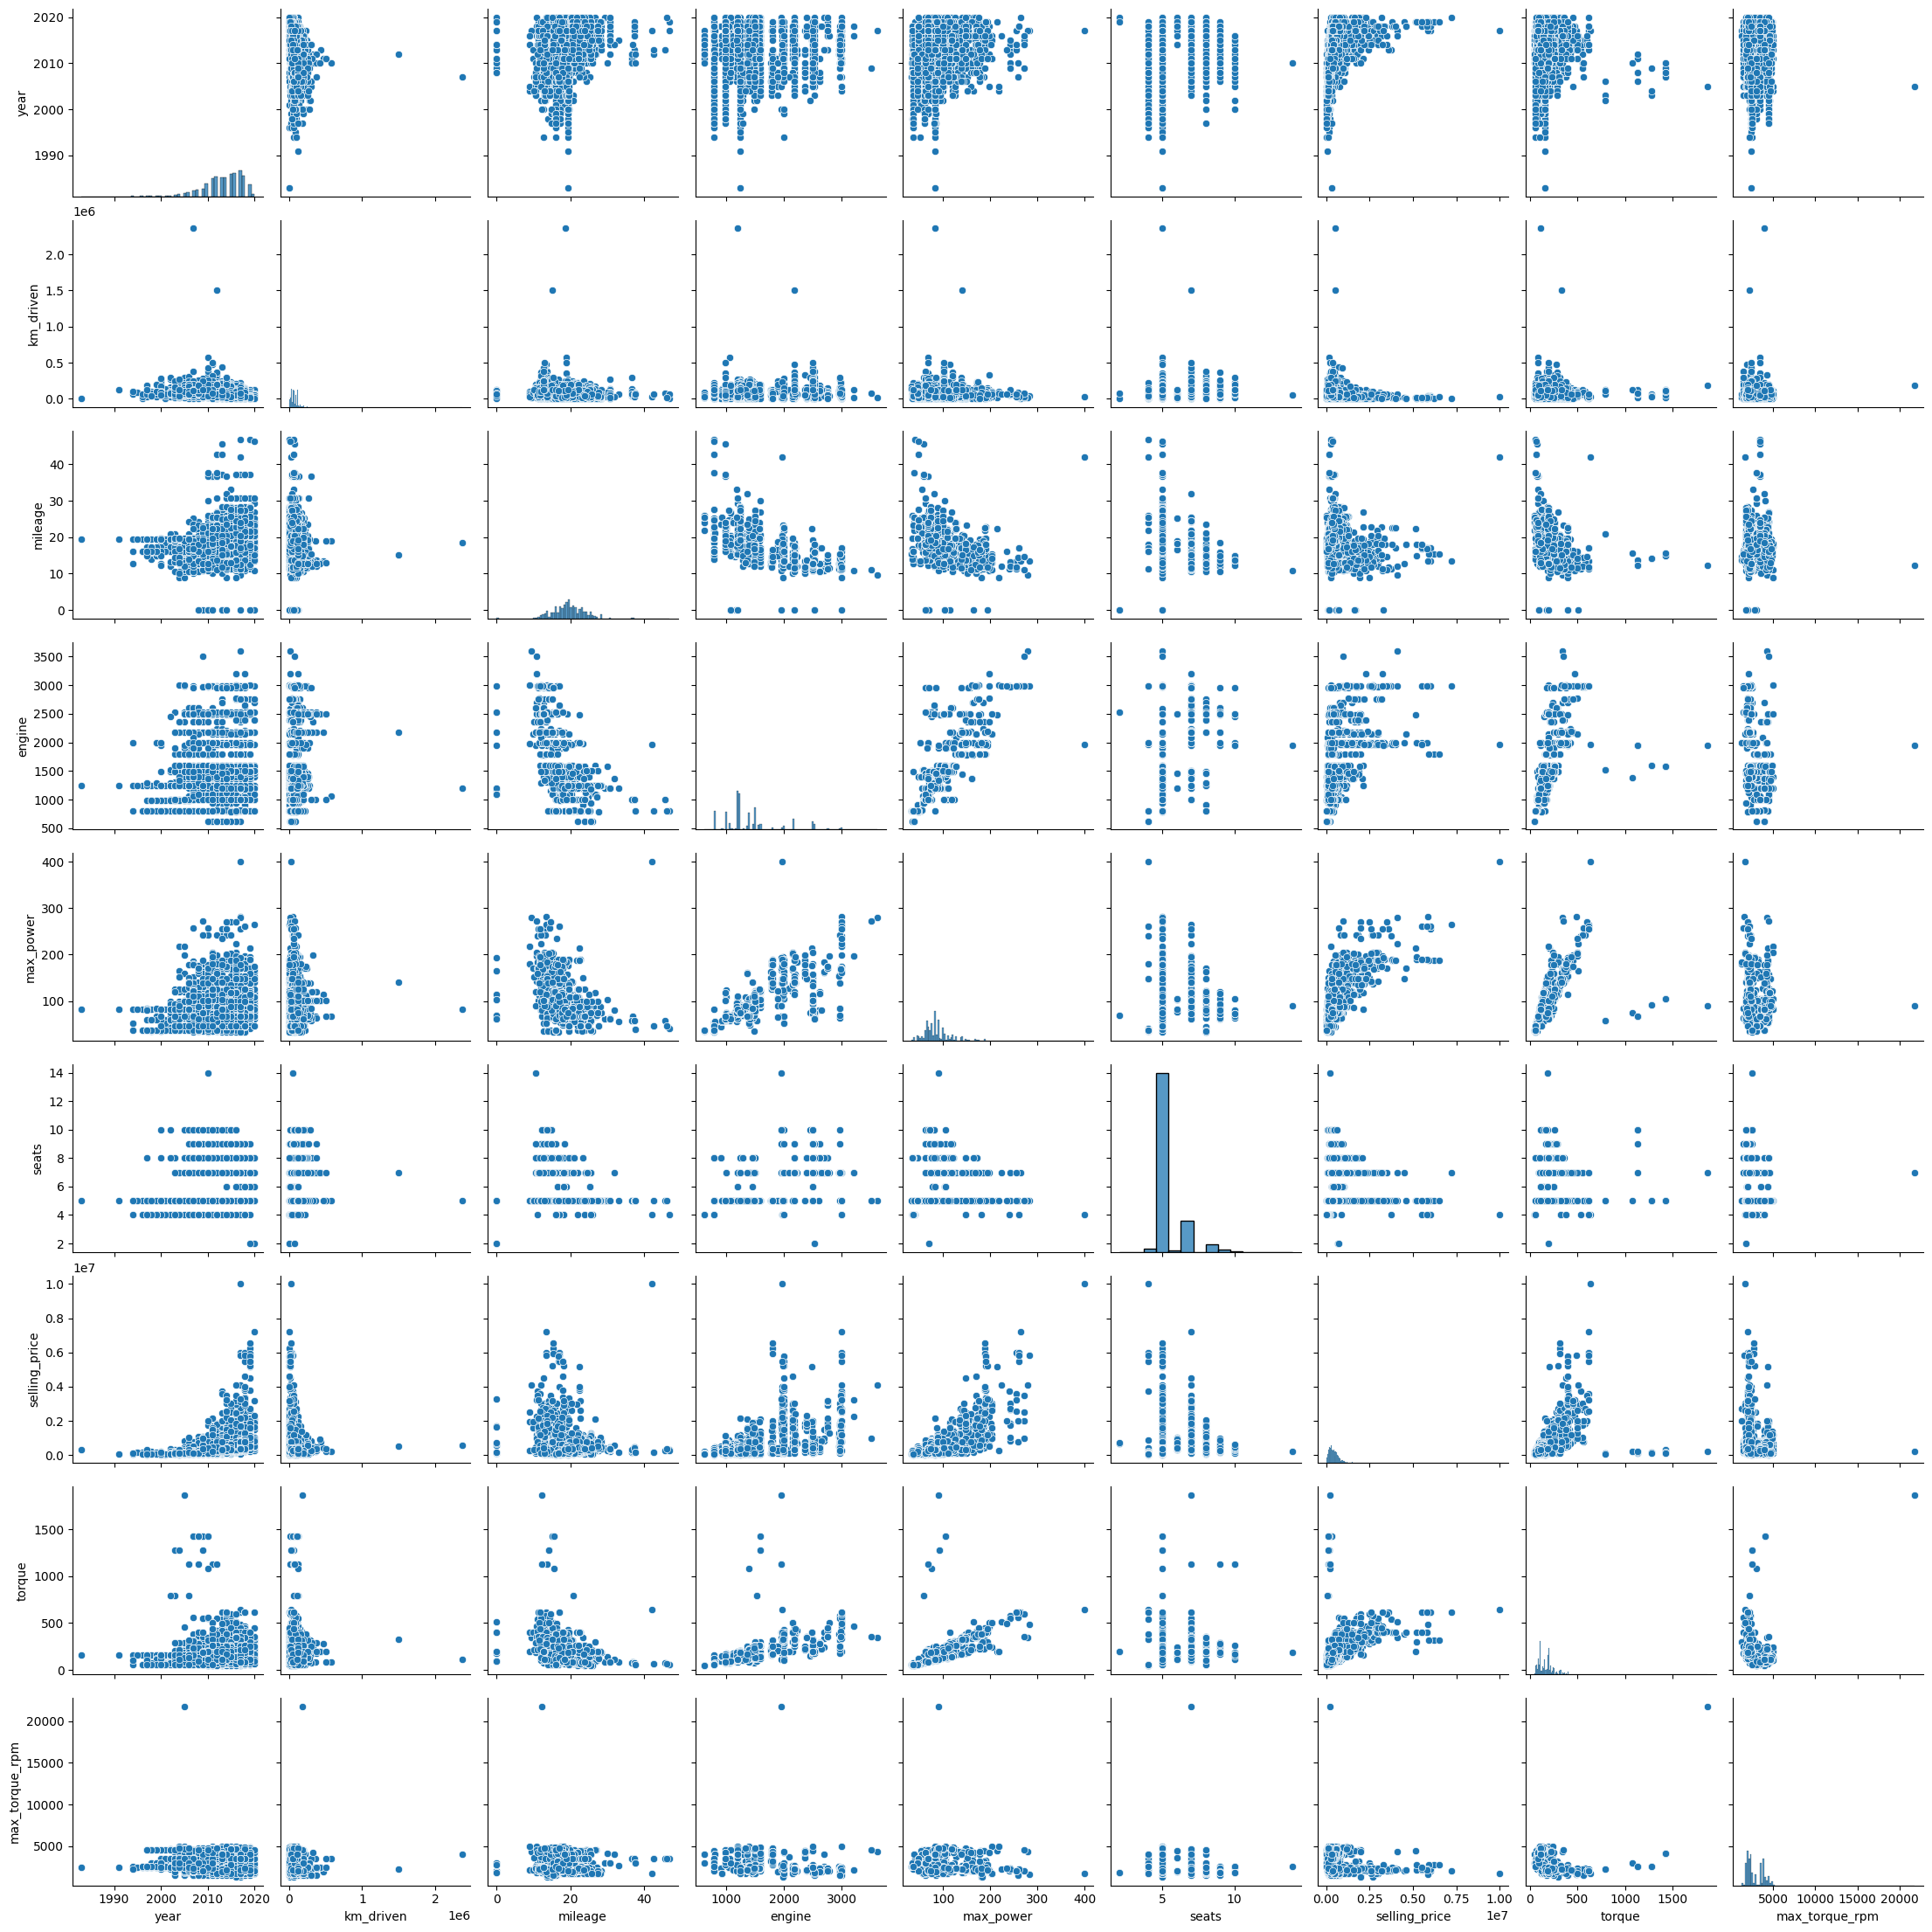

<Figure size 1500x2000 with 0 Axes>

In [767]:
sns.pairplot(df_train)
plt.figure(figsize=(15, 20))

`Судя по графикам, столбец year имеет нелинейную связь с целевой переменной, а столбцы engine, max_power и torque линейную. Скорее всего эти столбцы (engine, max_power и torque) будут иметь самую высокую корреляцию с selling_price в матрице корреляций.`
`Также, похоже, что признаки torque и max_power, torque и engine, max_power и engine имеют высокую линейную связь.`

<Figure size 1500x2000 with 0 Axes>

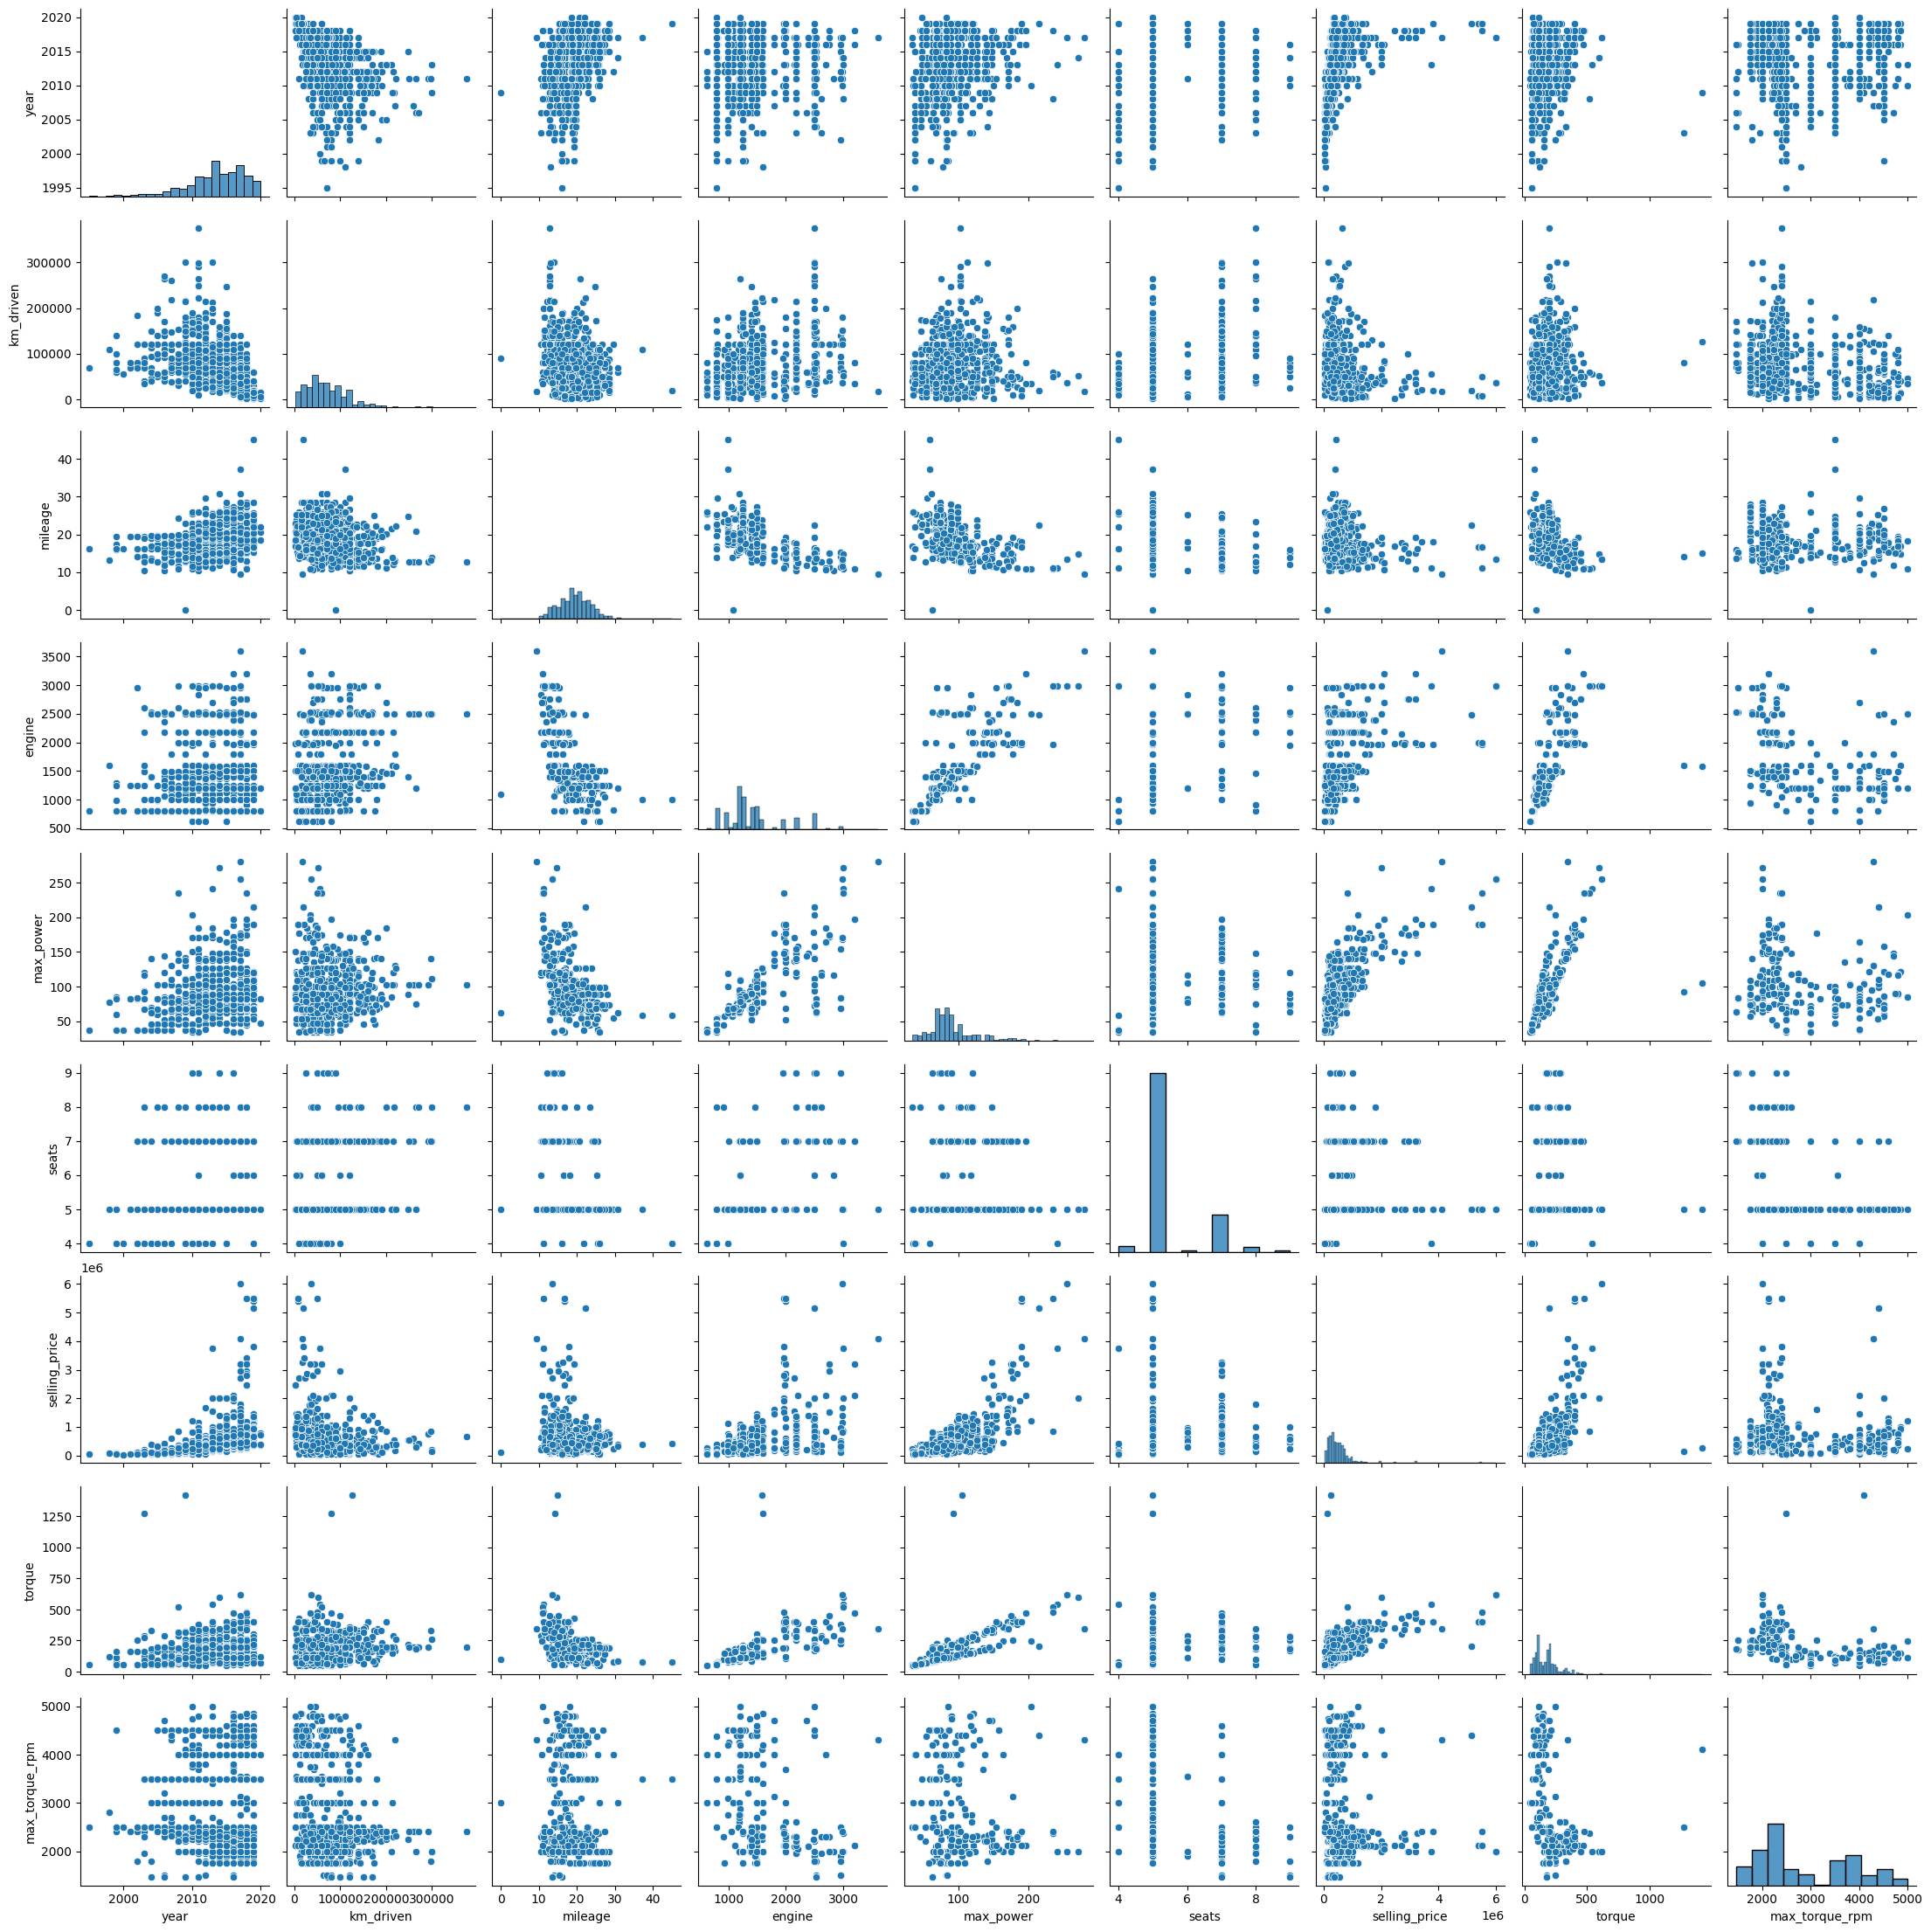

<Figure size 1500x2000 with 0 Axes>

In [768]:
sns.pairplot(df_test)
plt.figure(figsize=(15, 20))

`Кажется, что графики оказались довольно разными.`

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

<Axes: >

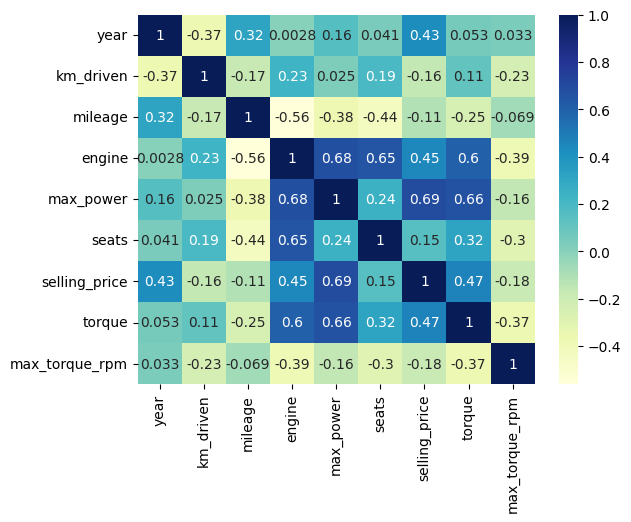

In [769]:
train_corr = df_train.corr(numeric_only=True)
sns.heatmap(train_corr, cmap="YlGnBu", annot=True)

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

In [770]:
min_corr = abs(train_corr).min().min()
train_corr[train_corr.isin([min_corr])]

,year,km_driven,mileage,engine,max_power,seats,selling_price,torque,max_torque_rpm
year,NaN,NaN,NaN,0.002819,NaN,NaN,NaN,NaN,NaN
km_driven,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine,0.002819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max_power,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seats,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
selling_price,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
torque,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max_torque_rpm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


`Судя по таблице сверху, наименьшую корреляцию имеют признаки engine и year, в целом это логично.`

<Axes: >

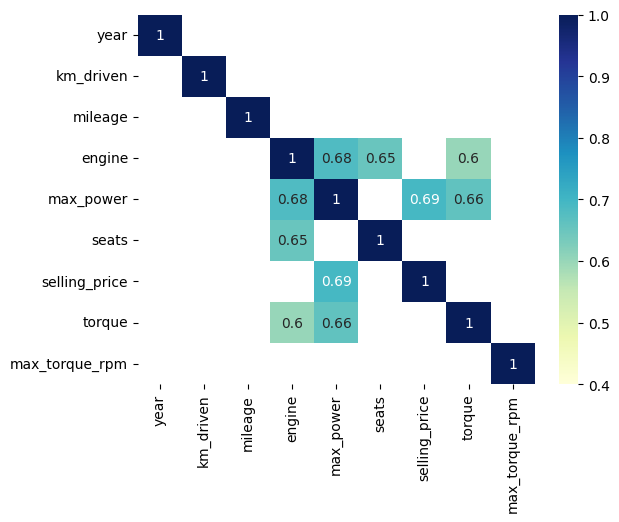

In [771]:
corr_train_selected = train_corr.mask((train_corr < 0.5), float("NaN"))

corr_train_selected = corr_train_selected.dropna(axis=0, how="all")
corr_train_selected = corr_train_selected.dropna(axis=1, how="all")

sns.heatmap(corr_train_selected, cmap="YlGnBu", annot=True, vmin=0.4)

`На верхнем графике отображены корреляции, значение которых превышает 0.5. Соответствующие признаки имеют довольно большую линейную связь.`
`Судя по обратной корреляции признаков year и km_driven (из первого графика) можно утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.`

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [ ] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [ ]

Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


In [772]:
from scipy import stats

Для реализации Корреляции Спирмена напишем свою функцию корреляции Пирсона.

In [773]:
def pearson_corr(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sqrt(np.sum((x - x_mean) ** 2) * np.sum((y - y_mean) ** 2))
    return numerator / denominator

In [774]:
from collections import defaultdict

def calc_rank(x):
    x_rank = defaultdict(list)
    for i, value in enumerate(sorted(x)):
        x_rank[value] += [i + 1]
    res = []
    for value in x:
        res += [np.mean(x_rank[value])]
    return res

def spearman_corr(x, y):
    x_rang = calc_rank(x)
    y_rang = calc_rank(y)
    return pearson_corr(x_rang, y_rang)

Сравним наши функции с библиотечной реализацией:

In [775]:
x = [10, 8, 6, 7, 4, 10, 9, 5]
y = [9, 9, 4, 5, 6, 8, 10, 7]

assert np.allclose(stats.pearsonr(x, y).statistic, pearson_corr(x, y))
assert np.allclose(stats.spearmanr(x, y).statistic, spearman_corr(x, y))

In [776]:
!pip install phik -q

Построим матрицу корреляции phik:

interval columns not set, guessing: ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price', 'torque', 'max_torque_rpm']


/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable name is large: 1924. Are you sure this is not an interval variable? Analysis for pairs of variables including name can be slow.
  warnings.warn(


<Axes: >

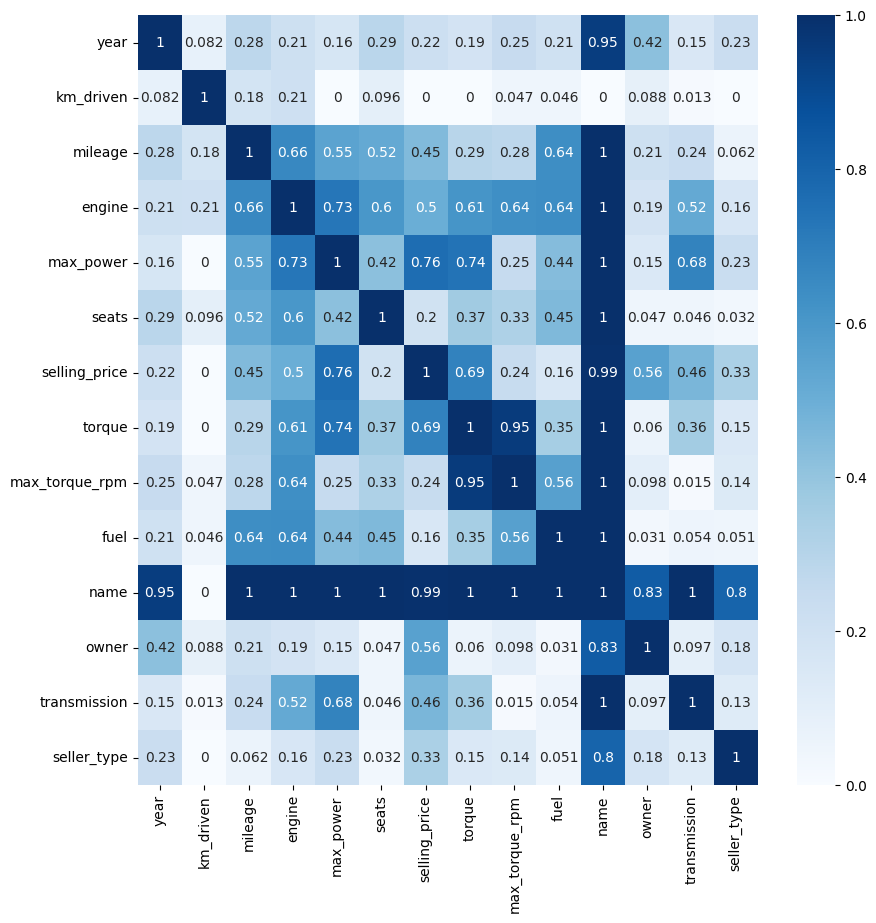

In [777]:
import phik

plt.figure(figsize=(10, 10))
sns.heatmap(df_train.phik_matrix(), cmap="Blues", annot=True)

`Здесь можно увидеть значимую корреляцию между категориальными переменными. Например, имеется корреляция, равная 0.46, между признаками transmission и selling_price, а также корреляция, равная 0.56 между fuel и max_torque_rpm.`

### **Дополнительные визуализации (бонус 0.2 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

`Можно нарисовать, например, зависимость вида топлива от цены автомобиля. Мы видим, что дизельные авто имеют самую высокую среднюю цену.`

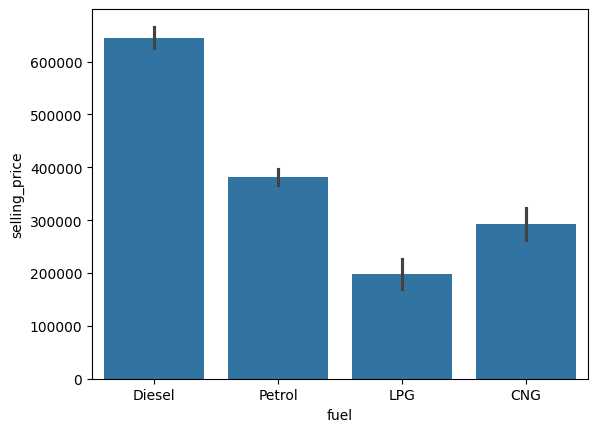

In [778]:
sns.barplot(x='fuel', y='selling_price', data = df_train);

`На графике внизу видим, что автомобили с автоматической коробкой передач в среднем дороже, чем авто с ручной.`

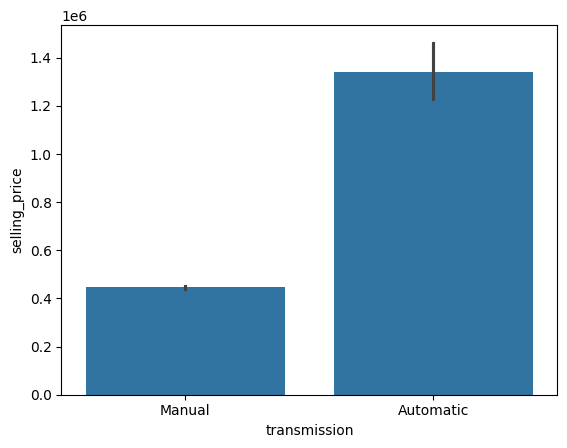

In [779]:
sns.barplot(x='transmission', y='selling_price', data = df_train);

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [780]:
df_train_numeric = df_train.select_dtypes(include='number').copy()

In [781]:
y_train = df_train_numeric['selling_price']
X_train = df_train_numeric.drop(columns='selling_price')

`Странно, тут должно быть 8 признаков после обработки столбца torque..`

In [782]:
# assert X_train.shape == (5840, 6)
assert X_train.shape == (5840, 8)

In [783]:
df_test_numeric = df_test.select_dtypes(include='number').copy()

In [784]:
y_test = df_test_numeric['selling_price']
X_test = df_test_numeric.drop(columns='selling_price')

In [785]:
# assert X_test.shape == (1000, 6)
assert X_test.shape == (1000, 8)

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [786]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [787]:
def get_report(X_train, y_train, X_test, y_test, model):
    test_pred = model.predict(X_test)
    train_pred = model.predict(X_train)

    print(f"Train MSE: {MSE(y_train, train_pred)}")
    print(f"Train R2: {r2_score(y_train, train_pred)}")
    print('-' * 30)
    print(f"Test MSE: {MSE(y_test, test_pred)}")
    print(f"Test R2: {r2_score(y_test, test_pred)}")

In [788]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model1 = Pipeline(
    steps=[("regressor", LinearRegression())]
)

model1.fit(X_train, y_train)

Pipeline(steps=[('regressor', LinearRegression())])

In [789]:
get_report(X_train, y_train, X_test, y_test, model1)

Train MSE: 114018810353.59837
Train R2: 0.6022206554545453
------------------------------
Test MSE: 230098683052.12537
Test R2: 0.5997090248994992


`По MSE довольно тяжело сделать какие-либо выводы, а вот R2 для линейной модели кажется довольно неплохим, но все равно низким.`

### **Задание 13 (0.15 балла)**

- [ ] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

In [790]:
def r2(true, pred):
    true_mean = np.mean(true)
    return 1 - ((np.sum((pred - true) ** 2)) / (np.sum((true - true_mean) ** 2)))

$ R^2 = 1-\frac{\sum_{i=1}^n(y_i-a(x_i))^2}{\sum_{i=1}^n(y_i-\overline{y})^2} $<br>
В числителе находится MSE без деления на количество наблюдений, в знаменателе - дисперсия, также без деления на количество наблюдений.

### **Бонус (0.15 балла)**

- [ ] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [ ] Объясните, когда применяется $\text{adjusted}-R^2$?

In [791]:
def adj_r2_score(true, pred, n_features):
    n = len(true)
    r2_value = r2(true, pred)
    return 1 - (((1 - r2_value * (n - 1))) / (n - n_features - 1))

$R^2_{adj} = 1 - \frac{(1-R^2)(n-1)}{n-p-1}$

`Мы используем adjusted R2 в том случае, если мы хотим сравнить модели с разным количество признаков.`

 ### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [792]:
from sklearn.preprocessing import StandardScaler

numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

numeric_features = df_train_numeric.drop(columns='selling_price').columns

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
    ]
)

model2 = Pipeline(
    steps=[("preprocessor", preprocessor),
           ("regressor", LinearRegression())]
)

model2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats',
       'torque', 'max_torque_rpm'],
      dtype='object'))])),
                ('regressor', LinearRegression())])

In [793]:
get_report(X_train, y_train, X_test, y_test, model2)

Train MSE: 114018810353.5982
Train R2: 0.602220655454546
------------------------------
Test MSE: 230098683052.1256
Test R2: 0.5997090248994987


### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [794]:
def draw_coef_barplot(lr, X_train):
    coefficients = pd.concat([pd.DataFrame(X_train.columns), pd.DataFrame(np.transpose(lr.coef_))], axis = 1)
    plt.bar(coefficients.iloc[:, 0], coefficients.iloc[:, 1])
    plt.xticks(rotation=90);

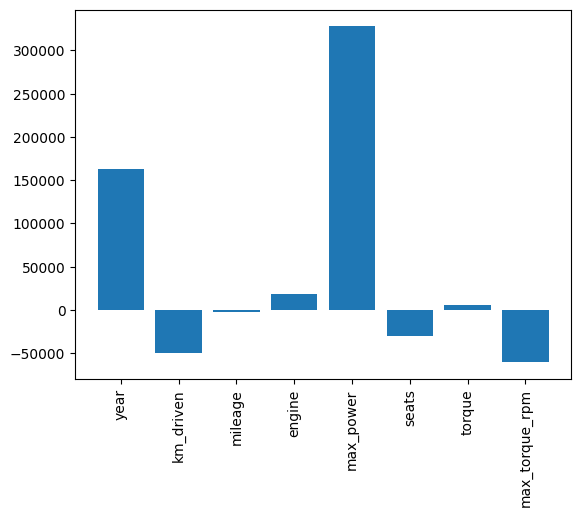

In [795]:
draw_coef_barplot(model2.named_steps['regressor'], X_train)

`Наиболее информативным оказался признак max_power.`

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [796]:
from sklearn.linear_model import Lasso

model3 = Pipeline(
        steps=[("preprocessor", preprocessor),
               ("regressor", Lasso())]
        )
model3.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats',
       'torque', 'max_torque_rpm'],
      dtype='object'))])),
                ('regressor', Lasso())])

In [797]:
get_report(X_train, y_train, X_test, y_test, model3)

Train MSE: 114018810365.58519
Train R2: 0.6022206554127267
------------------------------
Test MSE: 230099374740.69452
Test R2: 0.5997078216040777


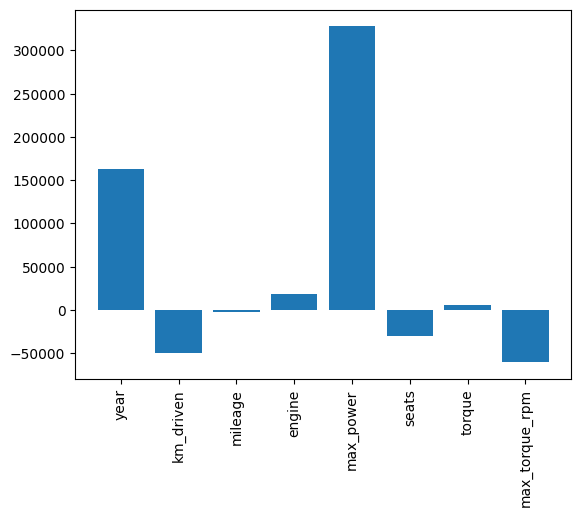

In [798]:
draw_coef_barplot(model3.named_steps['regressor'], X_train)

`L1 регуляризация с параметрами по умолчанию не занулила никакие веса. Может быть две причины: 1) неудачно подобран коэффициент alpha. 2) несмотря на то, что веса имеют низкое значение, они все равно имеют весомый вклад в прогноз и их не нужно занулять.`

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [799]:
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline(
        steps=[("preprocessor", preprocessor),
               ("regressor", Lasso())]
        )

parameters = {'regressor__alpha': [100_000, 10_000, 1_000, 100, 10, 1, 0.1, 0.01, 0.001]}
N_FOLDS = 10
gs = GridSearchCV(pipeline, parameters, cv=N_FOLDS, scoring='r2')
gs.fit(X_train, y_train)
model4 = gs.best_estimator_

In [800]:
gs.best_params_, gs.best_score_

({'regressor__alpha': 10000}, 0.580963281249549)

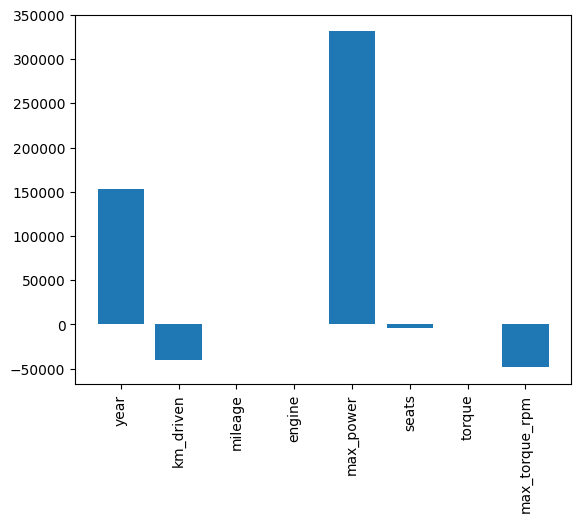

In [801]:
draw_coef_barplot(model4.named_steps['regressor'], X_train)

`1. Так как мы использовали 10 фолдов и 9 параметров, то всего обучилось 9 * 10 = 90 моделей.`<br>
`2. В качестве параметров для Lasso мы взяли только один - alpha, это коэффициент регуляризации.`<br>
`3. Лучшим коэффициентом регуляризации оказалось значение, равное 10_000. При такой регуляризации занулилось 3 веса: mileage, engine и torque.`

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [802]:
from sklearn.linear_model import ElasticNet

pipeline = Pipeline(
        steps=[("preprocessor", preprocessor),
               ("regressor", ElasticNet())]
        )

parameters = {'regressor__alpha': [100_000, 10_000, 1_000, 100, 10, 1, 0.1, 0.01, 0.001], 'regressor__l1_ratio': [1, 0.7, 0.5, 0.3, 0.2, 0.1]}
N_FOLDS = 10
gs = GridSearchCV(pipeline, parameters, cv=N_FOLDS, scoring='r2')
gs.fit(X_train, y_train)
model5 = gs.best_estimator_

In [803]:
gs.best_params_, gs.best_score_

({'regressor__alpha': 10000, 'regressor__l1_ratio': 1}, 0.580963281249549)

`1. Пришлось обучить 10 * 9 * 6 = 540 моделей.`<br>
`2. GridSearchCV подобрал такую же модель, как на предыдущем шаге. То есть, l1_ratio говорит о том, что мы используем L1 регуляризацию.`

### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [ ] Реализуйте модель с $L0$-регуляризаицей.
- [ ] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [ ] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [804]:
from itertools import combinations

class L0LinearRegression(BaseEstimator):
    def __init__(self, alpha=0):
        self.alpha = alpha

        return

    def fit(self, X, y):
        n_features = X.shape[1]

        best_loss = float('inf')
        best_model = None
        best_feature_subset = None

        for num_features in range(1, n_features + 1):
            for feature_subset in combinations(range(0, X.shape[1]), num_features):

                feature_subset = list(feature_subset)
                X_subset = pd.DataFrame(X).iloc[:, feature_subset].copy()
                lr = LinearRegression()
                lr.fit(X_subset, y)

                y_pred = lr.predict(X_subset)

                loss = MSE(y, y_pred) + self.alpha * num_features
                if loss < best_loss:
                    best_loss = loss
                    best_model = lr
                    best_feature_subset = feature_subset

        self.lr = best_model
        self.feature_subset = best_feature_subset

        return self

    def predict(self, X):
        X_subset = pd.DataFrame(X).iloc[:, self.feature_subset].copy()

        return self.lr.predict(X_subset)

In [805]:
pipeline = Pipeline(
        steps=[("preprocessor", preprocessor),
               ("regressor", L0LinearRegression())]
        )

parameters = {'regressor__alpha': [1_000, 100, 10]}
N_FOLDS = 10
gs = GridSearchCV(pipeline, parameters, cv=N_FOLDS, scoring='r2')
gs.fit(X_train, y_train)
model6 = gs.best_estimator_

In [806]:
gs.best_params_, gs.best_score_

({'regressor__alpha': 1000}, 0.5748593676673184)

`Мы видим, что модель не захотела выкидывать какие-либо признаки:`

In [807]:
gs.best_estimator_.named_steps['regressor'].feature_subset

[0, 1, 2, 3, 4, 5, 6, 7]

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [808]:
cols = df_train.columns
num_cols = df_train._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

In [809]:
df_train_cat = df_train[cat_cols].copy()
df_test_cat = df_test[cat_cols].copy()

`Кажется, что первое слово в столбце name обозначает марку автомобиля. Думаю, будет удовлетворительно, если я данный столбец просто заменю на марку.`

In [810]:
class NameTransformer(BaseEstimator, TransformerMixin):

    """
        Трансформирует столбец name.
    """

    def __init__(self):
        self.column_name = 'name'

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X['name'] = X['name'].apply(lambda x: x.split()[0])
        return X

In [811]:
nt = NameTransformer()
df_train_cat = nt.transform(df_train_cat)
df_test_cat = nt.transform(df_test_cat)

In [812]:
df_train_cat.head()

,fuel,name,owner,transmission,seller_type
0,Diesel,Maruti,First Owner,Manual,Individual
1,Diesel,Skoda,Second Owner,Manual,Individual
2,Diesel,Hyundai,First Owner,Manual,Individual
3,Petrol,Maruti,First Owner,Manual,Individual
4,Petrol,Hyundai,First Owner,Manual,Individual


In [813]:
df_train_cat.describe(include='object')

,fuel,name,owner,transmission,seller_type
count,5840,5840,5840,5840,5840
unique,4,30,5,2,3
top,Diesel,Maruti,First Owner,Manual,Individual
freq,3177,1804,3603,5336,5223


### **Задание 20 (0.1 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

`Данный пункт я сделаю чуть дальше и оформлю в виде pipeline, чтобы код выглядел более красивым.`

In [814]:
from sklearn.preprocessing import OneHotEncoder

# кодирование будет в следующих пунктах

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

`1. "Обучаем" OHE на train, применяем на test.`<br>
`2. Удаляем один столбец так как возникает линейная зависимость, из-за которой некоторые модели могут сломаться.`<br>
`3. Нет, некорректно, так как, несмотря на то, что по отдельности данные веса могут быть незначимыми, какая-нибудь их комбинация может дать прирост качеству модели.`

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [815]:
X_train = df_train.drop(columns='selling_price')
y_train = df_train['selling_price']

X_test = df_test.drop(columns='selling_price')
y_test = df_test['selling_price']

In [816]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler(with_mean=False))]
)
categorical_features = cat_cols + ['seats']

categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)

numeric_features = list(df_train_numeric.drop(columns='selling_price').columns)
numeric_features.remove('seats')

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

pipeline = Pipeline(
    steps=[("preprocessor", preprocessor),
           ("regressor", Ridge())]
)

parameters = {'regressor__alpha': [100_000, 10_000, 1_000, 100, 10, 1, 0.1, 0.01, 0.001]}
N_FOLDS = 10
gs = GridSearchCV(pipeline, parameters, cv=N_FOLDS, scoring='r2')
gs.fit(X_train, y_train)
model7 = gs.best_estimator_

`Видим, что качество стало сильно лучше. Даже коэффициент alpha, который мы подбираем по GridSearch нашелся адекватным, а не порядка 1000 как в прошлых пунтках.`

In [817]:
gs.best_params_, gs.best_score_

({'regressor__alpha': 0.1}, 0.7813899729776979)

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

`Попробуем нарисовать boxplots. Честно говоря, по данным графикам не видно что данные имеют явно выраженные выбросы, поэтому ничего удалять не будем.`

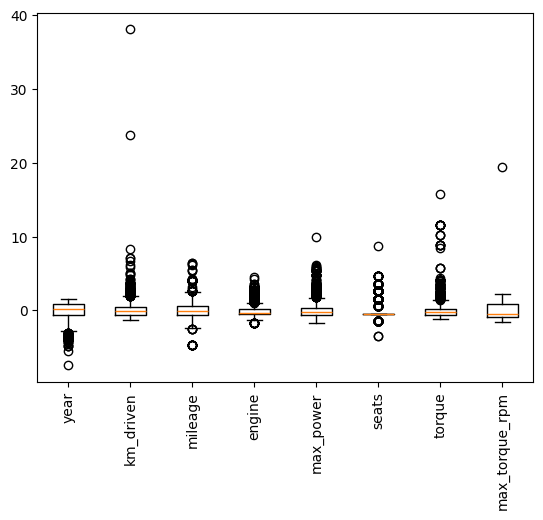

In [818]:
scaler = StandardScaler()
plt.boxplot(scaler.fit_transform(X_train.select_dtypes(include='number')))
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8], X_train.select_dtypes(include='number').columns, rotation=90)
plt.show()

`Давайте создадим единый класc, который будет использовать уже написанные классы для трансформации остальных столбцов.`

In [819]:
class BaseDataTransformer(BaseEstimator, TransformerMixin):

    def __init__(self):
        self.transformers = [MileageTransformer(), EngineTransformer(),
                             MaxPowerTransformer(), TorqueTransformer(),
                             NameTransformer()]

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X = X.replace({np.nan: None})

        for transformer in self.transformers:
            X = transformer.transform(X)

        return X

`Так как мы уже изменили изначальные df_train и df_test, то загрузим их заново`

In [839]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

In [840]:
y_train = df_train['selling_price']
X_train = df_train.drop(columns='selling_price')

y_test = df_test['selling_price']
X_test = df_test.drop(columns='selling_price')

`Список того, что добавил:`<br>
`1. Дискретизация признаков mileage и km_driven.`<br>
`2. Полиномиальные признаки.`

In [721]:
from sklearn.preprocessing import KBinsDiscretizer, FunctionTransformer, PolynomialFeatures
from sklearn.pipeline import make_pipeline

numeric_features = ['year', 'mileage', 'engine', 'max_power',
                    'torque', 'max_torque_rpm']

categorical_features = ['transmission', 'fuel', 'name',
                        'seller_type', 'owner', 'seats']

features_for_discretization = ['mileage', 'km_driven']

original_features = ['name', 'year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats']

numeric_transformer = Pipeline(
    steps=[
        ("num_imputer", SimpleImputer(strategy='median')),
        ("poly_features", PolynomialFeatures(include_bias=True)),
        ("scaler", StandardScaler(with_mean=False))
    ]
)

categorical_transformer = Pipeline(
    steps=[
        ("cat_imputer", SimpleImputer(strategy='constant', fill_value='missing')),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ],
)

discretizer_transformer = Pipeline(
    steps=[
        ("num_imputer", SimpleImputer(strategy='median')),
        ("discretizer", KBinsDiscretizer(encode="onehot"))
    ],
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, [7, 8, 9, 10, 11, 12]),
        ("dis", discretizer_transformer, [8, 2]),
        ("cat", categorical_transformer, [5, 3, 0, 4, 6, 10]),
    ],
    remainder='passthrough'
)

base_preprocessor = ColumnTransformer(
    transformers=[
        ("base", BaseDataTransformer(), np.arange(0, 12))
    ],
    remainder='passthrough'
)

pipeline = Pipeline(
    steps=[
        ('base', base_preprocessor),
        ("preprocessor", preprocessor),
        ("regressor", Ridge())
    ]
)

parameters = {'regressor__alpha': [100, 10, 1, 0.1, 0.01, 0.001],
              'preprocessor__dis__discretizer__n_bins': [5, 6, 7],
              'preprocessor__num__poly_features__degree': [1, 2, 3]}
N_FOLDS = 10
gs = GridSearchCV(pipeline, parameters, cv=N_FOLDS, scoring='r2', error_score='raise')
gs.fit(X_train, y_train)
model8 = gs.best_estimator_

`Кажется, качество стало еще лучше.`

In [722]:
gs.best_params_, gs.best_score_

({'preprocessor__dis__discretizer__n_bins': 6,
  'preprocessor__num__poly_features__degree': 2,
  'regressor__alpha': 1},
 0.8527046783597367)

`Получаем неплохой результат на тесте:`

In [726]:
test_pred = model8.predict(X_test)
train_pred = model8.predict(X_train)
print(f"Train r2 score: {r2_score(y_train, train_pred)}")
print(f"Test r2 score: {r2_score(y_test, test_pred)}")

Train r2 score: 0.8823233946521882
Test r2 score: 0.8545631113124428


`Сохраним лучшую модель:`

In [844]:
pip install dill -q

In [847]:
import dill

with open('model.pickle',"wb") as f:
        dill.dump(model8, f)

In [850]:
with open('model.pickle',"rb") as f:
        m = dill.load(f)

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [822]:
def business_metrics(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    dev_from_true = 100 * abs((y_pred - y_true) / y_true)
    return np.sum(dev_from_true <= 10) / len(dev_from_true)

# Не включаем первую модель, так как она не использует категориальные признаки.
for i, model in enumerate([model2, model3, model4, model5, model6, model7]):
    pred = model.predict(X_test)
    print(f'model {i + 1}: {round(business_metrics(y_test, pred), 3)}')

model 1: 0.242
model 2: 0.242
model 3: 0.245
model 4: 0.245
model 5: 0.242
model 6: 0.452


`Видим, что последняя модель лучше всего решает задачу бизнеса.`

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [ ] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



`Данная функция имеет вид квадратичной, если у нас есть недопрогноз. При перепрогнозе она является линейной. Опять же лучший результат показала последняя модель.`

In [823]:
def custom_loss(x):
    if x > 0:
        return x
    else:
        return x ** 2

def your_business_metrics(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean(list(map(custom_loss, y_pred - y_true)))

# Не включаем первую модель, так как она не использует категориальные признаки.
for i, model in enumerate([model2, model3, model4, model5, model6, model7]):
    pred = model.predict(X_test)
    print(f'model {i + 1}: {your_business_metrics(y_test, pred)}')

model 1: 203272219771.4142
model 2: 203273065776.61154
model 3: 211903541627.9576
model 4: 211903541627.9576
model 5: 203272219771.4142
model 6: 19552063013.06007


# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 25**

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 26**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией

3. Просматривает ноутбук с DS частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/Kz1ZRWj)

</details>

`Возможно, это кот Елены Кантонистовой.`